In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Исследование ситуации на рынке труда с целью конкретизации задачи

Данные о динамике безработицы и численности рабочей силы получены из ЕМИСС.

Изменение величины пособия по безработице: http://service.tspor.ru/nadbavki/

### Уровень безработицы
(среди населения возрастной группы 15-72 лет)

Общая безработица (по методологии МОТ)

In [18]:
# сведения об уровне общей квартальной безработицы (в процентах) за период 2010-2020 гг. в разрезе субъектов

unemployment_general = pd.read_csv(r'безработица по субъектам по кварталам.csv', sep=';', decimal=',')
unemployment_general = unemployment_general.rename({'Безработица' : 'Общая_безработица'}, axis=1)
unemployment_general.head()

,год,квартал,Субъект,Общая_безработица
0,2010,1,Белгородская область,5.3
1,2010,1,Брянская область,10.3
2,2010,1,Владимирская область,8.2
3,2010,1,Воронежская область,7.9
4,2010,1,Ивановская область,9.4


Регистрируемая безработица

In [19]:
# сведения об уровне месячной регистрируемой безработицы (в процентах) за период 2013-2020 гг. в разрезе субъектов

unemployment_reg = pd.read_csv(r'регистрируемая безработица по субъектам по месяцам.csv', sep=';', decimal=',')
unemployment_reg = unemployment_reg.rename({'Безработица' : 'Регистрируемая_безработица'}, axis=1)

unemployment_reg.loc[unemployment_reg.месяц <= 3, 'квартал'] = 1
unemployment_reg.loc[(unemployment_reg.месяц > 3) & (unemployment_reg.месяц <= 6), 'квартал'] = 2
unemployment_reg.loc[(unemployment_reg.месяц > 6) & (unemployment_reg.месяц <= 9), 'квартал'] = 3
unemployment_reg.loc[unemployment_reg.месяц > 9, 'квартал'] = 4

unemployment_reg['квартал'] = unemployment_reg['квартал'].astype(int)
unemployment_reg.head()

,год,месяц,Субъект,Регистрируемая_безработица,квартал
0,2013,1,Белгородская область,1.0,1
1,2013,1,Брянская область,1.3,1
2,2013,1,Владимирская область,1.3,1
3,2013,1,Воронежская область,1.1,1
4,2013,1,Ивановская область,1.5,1


In [20]:
# переводим в квартальную безработицу

unemployment_reg_quarterly = unemployment_reg.groupby(['год', 'квартал', 'Субъект'], as_index=False) \
                            .agg({'Регистрируемая_безработица' : 'mean'})
unemployment_reg_quarterly.head()

,год,квартал,Субъект,Регистрируемая_безработица
0,2013,1,Алтайский край,2.566667
1,2013,1,Амурская область,3.366667
2,2013,1,Архангельская область (кроме Ненецкого автоном...,1.700000
3,2013,1,Астраханская область,1.333333
4,2013,1,Белгородская область,1.066667


In [21]:
# общий датасет по квартальной безработице

unemployment = unemployment_reg_quarterly.merge(unemployment_general, how='left')
unemployment.dropna(inplace=True)
unemployment.head()

,год,квартал,Субъект,Регистрируемая_безработица,Общая_безработица
0,2013,1,Алтайский край,2.566667,9.0
1,2013,1,Амурская область,3.366667,6.3
2,2013,1,Архангельская область (кроме Ненецкого автоном...,1.700000,5.4
3,2013,1,Астраханская область,1.333333,7.8
4,2013,1,Белгородская область,1.066667,4.1


### Рабочая сила
(среди населения возрастной группы 15-72 лет)

In [22]:
# сведения о квартальной численности рабочей силы (в тыс. чел.) за период 2010-2020 гг. в разрезе субъектов

work_force = pd.read_csv(r'рабочая сила по субъектам по кварталам.csv', sep=';', decimal=',')
work_force['Рабочая сила'] = work_force['Рабочая сила'] * 1000
work_force.head()

,год,квартал,Субъект,Рабочая сила
0,2010,1,Белгородская область,788800.0
1,2010,1,Брянская область,647400.0
2,2010,1,Владимирская область,733800.0
3,2010,1,Воронежская область,1127100.0
4,2010,1,Ивановская область,561500.0


### Динамика безработицы по стране

In [173]:
# расчет количества безработного населения по субъектам за квартал

unemployment_data = unemployment.merge(work_force, how='left')
unemployment_data['Зарегистрированные_безработные'] = \
                    unemployment_data['Регистрируемая_безработица'] * unemployment_data['Рабочая сила'] / 100
unemployment_data['Фактически_безработные'] = \
                    unemployment_data['Общая_безработица'] * unemployment_data['Рабочая сила'] / 100
unemployment_data.head()

,год,квартал,Субъект,Регистрируемая_безработица,Общая_безработица,Рабочая сила,Зарегистрированные_безработные,Фактически_безработные
0,2013,1,Алтайский край,2.566667,9.0,1165600.0,29917.066667,104904.0
1,2013,1,Амурская область,3.366667,6.3,411200.0,13843.733333,25905.6
2,2013,1,Архангельская область (кроме Ненецкого автоном...,1.700000,5.4,599800.0,10196.600000,32389.2
3,2013,1,Астраханская область,1.333333,7.8,527800.0,7037.333333,41168.4
4,2013,1,Белгородская область,1.066667,4.1,803700.0,8572.800000,32951.7


In [174]:
# расчет количества безработного населения в стране по кварталам

unemployment_data_quarterly = unemployment_data.groupby(['год', 'квартал'], as_index=False).agg({
    'Рабочая сила' : 'sum',
    'Зарегистрированные_безработные' : 'sum',
    'Фактически_безработные' : 'sum'
})

# расчет безработицы

unemployment_data_quarterly['Регистрируемая_безработица'] = \
            unemployment_data_quarterly['Зарегистрированные_безработные'] / unemployment_data_quarterly['Рабочая сила'] * 100
unemployment_data_quarterly['Общая_безработица'] = \
            unemployment_data_quarterly['Фактически_безработные'] / unemployment_data_quarterly['Рабочая сила'] * 100

# расчет по годам

unemployment_data_yearly = unemployment_data_quarterly.groupby('год').mean().drop('квартал', axis=1)

Text(2018.75, 4.2, '4,57%')

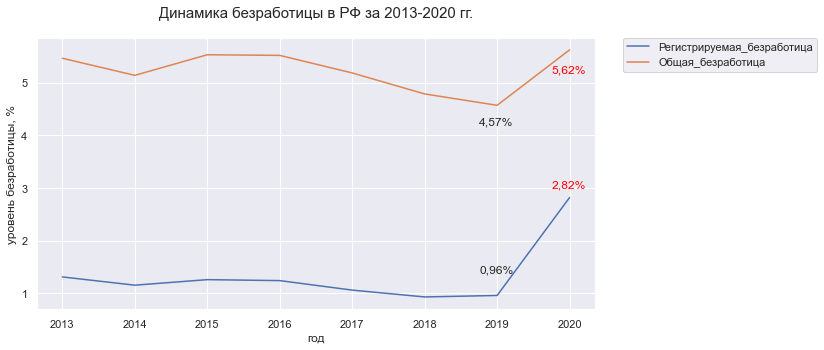

In [175]:
# динамика безработицы в России по годам (без учета значений 4-ого квартала 2020 г.)

sns.set(rc={'figure.figsize' : (10, 5)})
unemployment_data_yearly[['Регистрируемая_безработица', 'Общая_безработица']].plot()
plt.ylabel('уровень безработицы, %')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Динамика безработицы в РФ за 2013-2020 гг.', fontsize=15, pad=20)

plt.annotate('2,82%', xy=(2019.75, 3), fontsize=12, color='red')
plt.annotate('0,96%', xy=(2018.75, 1.4), fontsize=12)
plt.annotate('5,62%', xy=(2019.75, 5.2), fontsize=12, color='red')
plt.annotate('4,57%', xy=(2018.75, 4.2), fontsize=12)

Наблюдаем ощутимый рост общей (~1%) и зарегистрированной безработицы (2%) в 2020 году в условиях пандемии коронавируса. Интересны различия в поведении двух показателей: более сильный рост зарегистрированной безработицы может свидетельствовать о трудностях с работой, возникших у лиц, ранее не заинтересованных в поддержке государства (работающие неофициально, фрилансеры и т.п.).

До 2020 года наоборот наблюдалось постепенное снижение уровня безработицы.

### Пособие по безработице

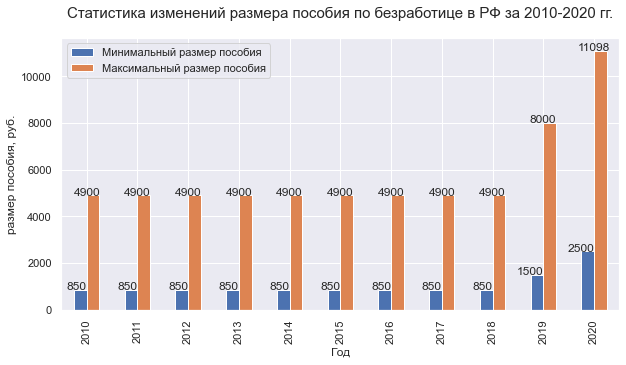

In [196]:
# сведения о размере пособия по безработице (в руб.) за период 2010-2020 гг.

unemployment_benefit = pd.read_csv(r'размер пособия по безработице.csv', sep=';', decimal=',')

# в среднем за каждый год

unemployment_benefit_yearly_mean = unemployment_benefit.groupby('Год').mean().drop(['Квартал', 'Месяц'], axis=1)

sns.set(rc={'figure.figsize' : (10, 5)})

unemployment_benefit_yearly_mean.plot.bar()
plt.ylabel('размер пособия, руб.')
plt.title('Статистика изменений размера пособия по безработице в РФ за 2010-2020 гг.', fontsize=15, pad=20)

for i, j in enumerate(unemployment_benefit_yearly_mean['Минимальный размер пособия']):
    plt.text(i, j, round(j), horizontalalignment='right')
    
for i, j in enumerate(unemployment_benefit_yearly_mean['Максимальный размер пособия']):
    plt.text(i, j, round(j), horizontalalignment='center')


Впервые с 2019 года был увеличен базовый размер пособия по безработице с 850-4900 руб. до 1500-8000 руб. В связи с пандемией в 2020 году на период с 05-2020 по 08-2020 увеличен минимальны размер пособия до 4500 руб. Максимальный размер - до 12130 руб. с апреля и до конца 2020 года (предварительно).

### *Районные коэффициенты

Text(0.5, 1.0, 'Значения районных коэффициентов на 2020 г.')

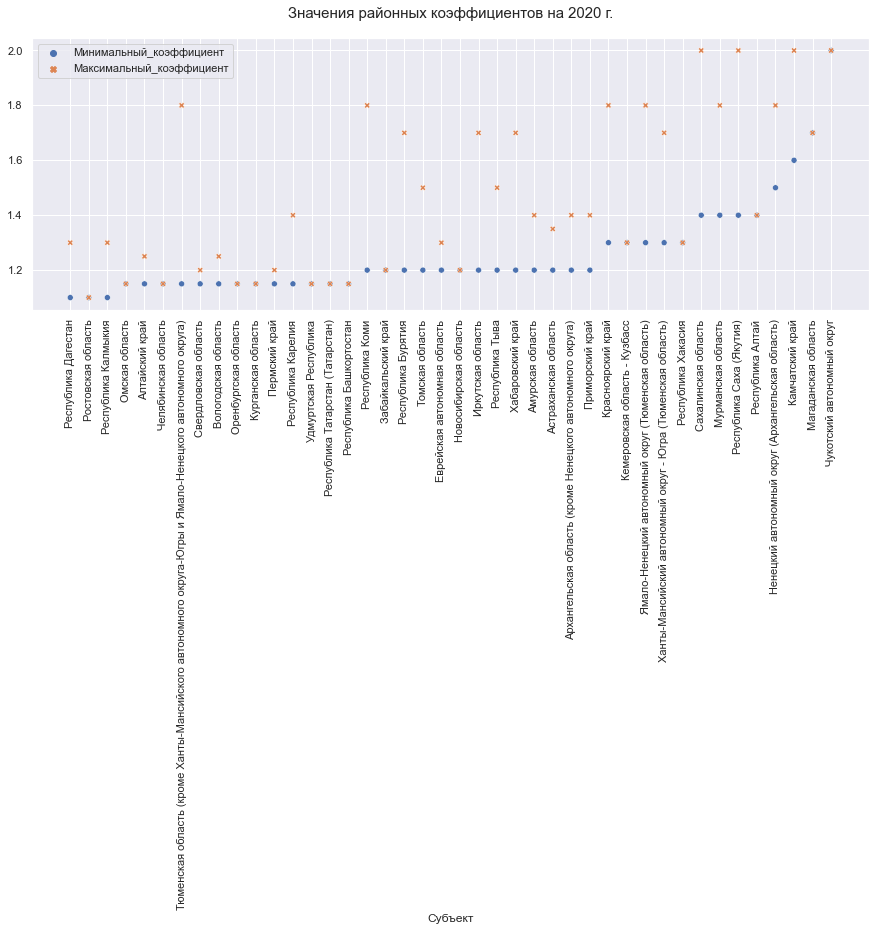

In [177]:
# сведения о размере региональных коэффициентов

regional_coefficients = pd.read_csv(r'региональные коэффициенты.csv', sep=';', decimal=',')
regional_coefficients = regional_coefficients.rename({
    'Минимальный коэффициент' : 'Минимальный_коэффициент',
    'Максимальный коэффициент' : 'Максимальный_коэффициент'
}, axis=1).sort_values('Минимальный_коэффициент')

sns.set(rc={'figure.figsize' : (15, 5)})
plt.xticks(rotation=90)
sns.scatterplot(data=regional_coefficients[regional_coefficients.Минимальный_коэффициент > 1].set_index('Субъект'))
plt.title('Значения районных коэффициентов на 2020 г.', fontsize=15, pad=20)

### Расчет коридора расходов бюджета на выплату пособий по безработице
(в предположении, что все зарегистрированные безработные получают пособие)

In [197]:
df = unemployment_data.iloc[:,[0,1,2,6]].merge(regional_coefficients, how='left')
df.head()

,год,квартал,Субъект,Зарегистрированные_безработные,Минимальный_коэффициент,Максимальный_коэффициент
0,2013,1,Алтайский край,29917.066667,1.15,1.25
1,2013,1,Амурская область,13843.733333,1.20,1.40
2,2013,1,Архангельская область (кроме Ненецкого автоном...,10196.600000,1.20,1.40
3,2013,1,Астраханская область,7037.333333,1.20,1.35
4,2013,1,Белгородская область,8572.800000,1.00,1.00


In [200]:
unemployment_benefit = unemployment_benefit.groupby(['Год', 'Квартал'], as_index=False).mean()

df = df.merge(unemployment_benefit, how='left', left_on=['год', 'квартал'], right_on=['Год', 'Квартал']) \
        .drop(['Год', 'Квартал', 'Месяц'], axis=1)
df.head()

,год,квартал,Субъект,Зарегистрированные_безработные,Минимальный_коэффициент,Максимальный_коэффициент,Минимальный размер пособия,Максимальный размер пособия
0,2013,1,Алтайский край,29917.066667,1.15,1.25,850,4900
1,2013,1,Амурская область,13843.733333,1.20,1.40,850,4900
2,2013,1,Архангельская область (кроме Ненецкого автоном...,10196.600000,1.20,1.40,850,4900
3,2013,1,Астраханская область,7037.333333,1.20,1.35,850,4900
4,2013,1,Белгородская область,8572.800000,1.00,1.00,850,4900


In [201]:
# расчет коридора расходов бюджета в предположении, что все безработные получали пособие в рассчетном периоде (в млрд руб.)

df['Коридор_минимум'] = df['Зарегистрированные_безработные'] * df['Минимальный_коэффициент'] * df['Минимальный размер пособия'] * 3 / 1000000000
df['Коридор_максимум'] = df['Зарегистрированные_безработные'] * df['Максимальный_коэффициент'] * df['Максимальный размер пособия'] * 3 / 1000000000
df.dropna(inplace=True)

In [203]:
# коридор для страны в целом по годам (не учитывая 4-ый квартал 2020 года)

df_year = df.groupby(['год'], as_index=False).agg({'Коридор_минимум' : sum,
                                         'Коридор_максимум' : sum})
df_year = df_year.set_index(df_year.год).drop('год', axis=1)

Text(2018.7, 20, '14,2')

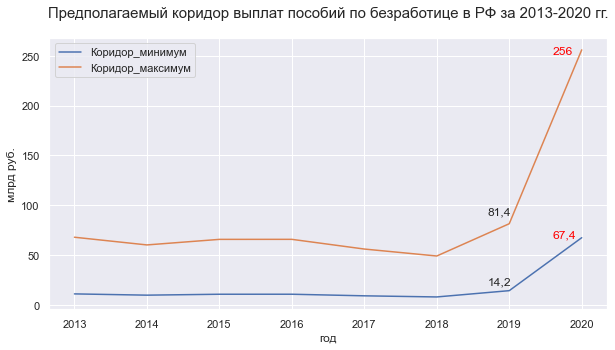

In [227]:
sns.set(rc={'figure.figsize' : (10, 5)})

df_year.plot()
plt.ylabel('млрд руб.')
plt.title('Предполагаемый коридор выплат пособий по безработице в РФ за 2013-2020 гг.', fontsize=15, pad=20)

plt.annotate('256', xy=(2019.6, 252), fontsize=12, color='red')
plt.annotate('81,4', xy=(2018.7, 90), fontsize=12)
plt.annotate('67,4', xy=(2019.6, 67), fontsize=12, color='red')
plt.annotate('14,2', xy=(2018.7, 20), fontsize=12)

Одновременный рост безработицы и увелечение размера пособий привело к взрывному росту затрат на выплату пособий.

Таким образом, можно конкретизировать ожидаемый эффект от разработанной модели оценки навыков соискателя:

соискатель заполняет резюме и видит тот уровень з/п, на который может рассчитывать при трудоустройстве -> соискатель откликается на вакансии с соответствующим уровнем з/п -> уменьшается время поиска работы соискателем -> если соискатель является безработным, уменьшаются расходы государства на выплату пособия по безработице.